In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import numpy as np
import pandas as pd
import math
from sklearn.metrics import jaccard_score
from sklearn.metrics import normalized_mutual_info_score
from scipy.stats import spearmanr
import seaborn as sns

In [2]:
agg = pd.read_csv("../data/y_rank.csv")

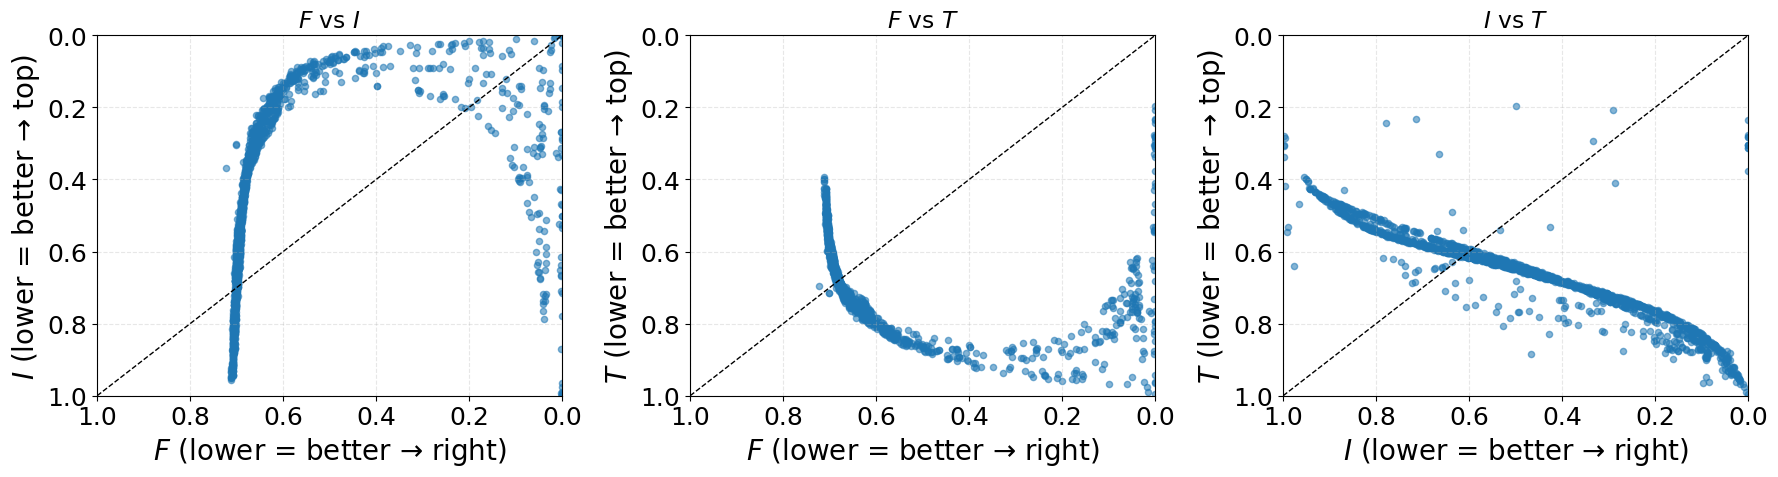

In [3]:


# Run for R_F vs R_T
#scatter_rank_true(r_f, r_t, r"$R_F$", r"$R_T$", "rank_RF_vs_RT_true.png", jitter=0.15)
#scatter_rank_true(r_f, r_i, r"$R_F$", r"$R_I$", "rank_RF_vs_RI_true.png", jitter=0.15)
#scatter_rank_true(r_i, r_t, r"$R_I$", r"$R_T$", "rank_RI_vs_RT_true.png", jitter=0.15)
f = np.asarray(agg["dF_sum"], dtype=float)
i = np.asarray(agg["dI_mean"], dtype=float)
t = np.asarray(agg["dT_mean"], dtype=float)

pairs = [
    (f, i, r"$F$", r"$I$"),
    (f, t, r"$F$", r"$T$"),
    (i, t, r"$I$", r"$T$")
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (x, y, xlab, ylab) in zip(axes, pairs):
    mask = np.isfinite(x) & np.isfinite(y)
    x, y = x[mask], y[mask]
   
    ax.scatter(x, y, s=20, alpha=0.55)
    
    # consistent limits and inverted orientation
    r_min, r_max = 0, 1
   
    ax.plot([r_max, r_min], [r_max, r_min], "--", color="k", lw=1)
    
    ax.set_xlim(r_max, r_min)
    ax.set_ylim(r_max, r_min)
   
    # axis labels and title
    ax.set_xlabel(f"{xlab} (lower = better → right)",size=20)
    ax.set_ylabel(f"{ylab} (lower = better → top)",size=20)
    ax.tick_params(axis="both",labelsize=18)
    ax.set_title(f"{xlab} vs {ylab}")
    ax.grid(True, linestyle="--", alpha=0.3)

    # tick marks every 250 ranks
    #ticks = np.arange(1500, -1, -250)
    #ax.set_xticks(ticks)
    #ax.set_yticks(ticks)

plt.tight_layout()
plt.savefig("stat_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

KeyError: "['i_d'] not in index"

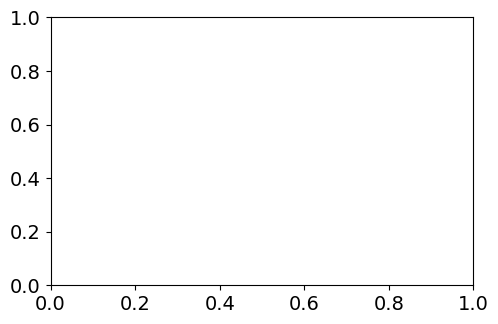

In [4]:

# Load the datase
# Define metric columns and readable labels
metric_map = {
    "i_d": "In-degree",
    "w": "Total weight",
    "close": "Closeness centrality",
    "harm": "Harmonic centrality",
    "ev": "Eigenvector centrality",
    'bc': "Betweeness centrality",
    'clust':'Clustering coeffiecent',
    'h': 'Hectares'
}

# Ensure R_F is numeric
agg["R_F"] = pd.to_numeric(agg["dF_sum"], errors="coerce")

# Set up plotting grid
cols = 2
rows = (len(metric_map) + cols - 1) // cols
plt.figure(figsize=(6 * cols, 4 * rows))

# Generate scatter plots
for i, (col, label) in enumerate(metric_map.items(), 1):
    ax = plt.subplot(rows, cols, i)
    
    # Drop NA and filter positive values for log scaling
    subdf = agg[[col, "dF_sum"]].dropna()
    subdf = subdf[(subdf[col] > 0) & (subdf["dF_sum"] > 0)]
    
    # Compute correlations
    #pearson_corr, _ = pearsonr(subdf[col], subdf["dF_sum"])
    #spearman_corr, _ = spearmanr(subdf[col], subdf["dF_sum"])
    
    # Plot
    sns.scatterplot(x=subdf[col], y=subdf["dF_sum"], s=25, alpha=0.7)
   # ax.set_ylim(.05,.15)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.invert_yaxis()
    ax.set_xlabel(label)
    ax.set_ylabel(f"$F$")
    ax.set_title(f"{label}")
    ax.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.savefig("figs/F_vs_network_metrics_loglog.png", dpi=300, bbox_inches="tight")
#plt.show()

# %%
# Optional: Display correlation table sorted by strongest Spearman correlation
corrs = []
for col, label in metric_map.items():
    subdf = agg[[col, "dF_sum"]].dropna()
    subdf = subdf[(subdf[col] > 0) & (subdf["dF_sum"] > 0)]
    #pearson_corr, _ = pearsonr(subdf[col], subdf["dF_sum"])
    #spearman_corr, _ = spearmanr(subdf[col], subdf["dF_sum"])
    #corrs.append({"Metric": label, "Pearson": pearson_corr, "Spearman": spearman_corr})

#corr_df = pd.DataFrame(corrs).sort_values("Spearman", ascending=False)
#display(corr_df)


In [ ]:

# Load the datase
# Define metric columns and readable labels
metric_map = {
    "i_d": "In-degree",
    "w": "Total weight",
    "close": "Closeness centrality",
    "harm": "Harmonic centrality",
    "ev": "Eigenvector centrality",
    'bc': "Betweeness centrality",
    'clust':'Clustering coeffiecent',
    'h': 'Hectares'
}

# Ensure R_F is numeric
agg["R_I"] = pd.to_numeric(agg["dI_mean"], errors="coerce")

# Set up plotting grid
cols = 2
rows = (len(metric_map) + cols - 1) // cols
plt.figure(figsize=(6 * cols, 4 * rows))

# Generate scatter plots
for i, (col, label) in enumerate(metric_map.items(), 1):
    ax = plt.subplot(rows, cols, i)
    plot_agg = agg[agg["R_I"] < 0.1]
    plot_agg = agg[agg["R_F"] < 0.1]

    # Drop NA and filter positive values for log scaling
    subdf = plot_agg[[col, "dI_mean","dF_sum"]].dropna()
    subdf = subdf[(subdf[col] > 0) & (subdf["dI_mean"] > 0) & (subdf["dF_sum"])]
    
    # Compute correlations
    #pearson_corr, _ = pearsonr(subdf[col], subdf["dI_mean"])
    #spearman_corr, _ = spearmanr(subdf[col], subdf["dI_mean"])
    
    # Plot
    sns.scatterplot(x=subdf[col], y=subdf["dI_mean"], s=25, alpha=0.7,hue=subdf["dF_sum"])
   # ax.set_ylim(.05,.15)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.invert_yaxis()
    ax.set_xlabel(label)
    ax.set_ylabel(f"$I$")
    ax.set_title(f"{label}")
    ax.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.savefig("figs/I_vs_network_metrics_loglog.png", dpi=300, bbox_inches="tight")
#plt.show()

# %%
# Optional: Display correlation table sorted by strongest Spearman correlation
corrs = []
for col, label in metric_map.items():
    subdf = agg[[col, "dI_mean"]].dropna()
    subdf = subdf[(subdf[col] > 0) & (subdf["dI_mean"] > 0)]
    #pearson_corr, _ = pearsonr(subdf[col], subdf["dI_mean"])
    #spearman_corr, _ = spearmanr(subdf[col], subdf["dF_sum"])
    #corrs.append({"Metric": label, "Pearson": pearson_corr, "Spearman": spearman_corr})

#corr_df = pd.DataFrame(corrs).sort_values("Spearman", ascending=False)
#display(corr_df)


In [ ]:

# Load the datase
# Define metric columns and readable labels
metric_map = {
    "i_d": "In-degree",
    "w": "Total weight",
    "close": "Closeness centrality",
    "harm": "Harmonic centrality",
    "ev": "Eigenvector centrality",
    'bc': "Betweeness centrality",
    'clust':'Clustering coeffiecent',
    'h': 'Hectares'
}

# Ensure R_F is numeric
agg["R_F"] = pd.to_numeric(agg["dT_mean"], errors="coerce")

# Set up plotting grid
cols = 2
rows = (len(metric_map) + cols - 1) // cols
plt.figure(figsize=(6 * cols, 4 * rows))

# Generate scatter plots
for i, (col, label) in enumerate(metric_map.items(), 1):
    ax = plt.subplot(rows, cols, i)
    
    # Drop NA and filter positive values for log scaling
    subdf = agg[[col, "dT_mean"]].dropna()
    subdf = subdf[(subdf[col] > 0) & (subdf["dT_mean"] > 0)]
    
    # Compute correlations
    #pearson_corr, _ = pearsonr(subdf[col], subdf["dT_mean"])
    #spearman_corr, _ = spearmanr(subdf[col], subdf["dT_mean"])
    
    # Plot
    sns.scatterplot(x=subdf[col], y=subdf["dT_mean"], s=25, alpha=0.7,c="green")
   # ax.set_ylim(.05,.15)
    ax.set_xscale("log")
    #ax.set_yscale("log")
    ax.invert_yaxis()
    ax.set_xlabel(label)
    ax.set_ylabel(f"$T$")
    ax.set_title(f"{label}")
    ax.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.savefig("figs/T_vs_network_metrics_loglog.png", dpi=300, bbox_inches="tight")
#plt.show()

# %%
# Optional: Display correlation table sorted by strongest Spearman correlation
corrs = []
for col, label in metric_map.items():
    subdf = agg[[col, "dT_mean"]].dropna()
    subdf = subdf[(subdf[col] > 0) & (subdf["dT_mean"] > 0)]
    #pearson_corr, _ = pearsonr(subdf[col], subdf["dT_mean"])
    #spearman_corr, _ = spearmanr(subdf[col], subdf["dF_sum"])
    #corrs.append({"Metric": label, "Pearson": pearson_corr, "Spearman": spearman_corr})

#corr_df = pd.DataFrame(corrs).sort_values("Spearman", ascending=False)
#display(corr_df)
